# Библиотеки

In [1]:
import numpy as np
import pandas as pd
import sympy

# Исходные данные

In [2]:
# r1 = r2 = 920; N_p = -690; M_p = 172.5; Q_p = -17.25
# L = 1150

r1 = r2 = 1000; N_p = -800; M_p = 200; Q_p = -30
L = 1200

sigma_02 = 160; sigma_pc = 120; sigma_star = 171.8; E = 6.8 * 1e+4; k = 0.3
n_nodes = 8

In [3]:
# не обращайте внимания
flag = False

# 7.1. Геометрия переходной фермы

In [4]:
psi = np.pi / n_nodes
a = r2 * np.cos(psi)
b = r2 * np.sin(psi)

tg_gamma = (a - r1) / L
gamma = np.arctanh(tg_gamma)
h = L / np.cos(gamma)
l = (b ** 2 + h ** 2) ** 0.5

sin_betta = b / l; cos_betta = h / l; tg_betta = b / h

print('psi', np.degrees(psi))
print('a', a)
print('b', b)
print()
print('tg_gamma', tg_gamma)
print('cos_gamma', np.cos(gamma))
print('sin_gamma', np.sin(gamma))
print()
print('h', h)
print('l', l)
print()
print('sin_betta', sin_betta)
print('cos_betta', cos_betta)
print('tg_betta', tg_betta)

psi 22.5
a 923.8795325112867
b 382.6834323650898

tg_gamma -0.06343372290726108
cos_gamma 0.9979833457860829
sin_gamma -0.06347630686811882

h 1202.4248751914736
l 1261.8526815305966

sin_betta 0.3032710854177558
cos_betta 0.9529043229776724
tg_betta 0.3182597435071787


# 7.2. Расчет усилий в стержнях переходной фермы

## Первое и второе слагаемое для P_расч.

In [5]:
print(1 / n_nodes / np.cos(gamma) * N_p, 
      1 / n_nodes / np.cos(gamma) * 2 * M_p * 1e+3 / r1, "cos(tetta)")

-100.2020729326228 50.1010364663114 cos(tetta)


## T_расч.

In [6]:
print(2 / n_nodes * (Q_p + M_p * 1e+3 / r1 * tg_gamma), "sin(tetta)")

-10.671686145363054 sin(tetta)


## Получение таблицы 7.1

In [7]:
tetta = np.arange(0, 360, 45)
radians_tetta = np.radians(tetta)

def p_value_i_node(tetta):
    return 1 / n_nodes / np.cos(
        gamma) * N_p + 1 / n_nodes / np.cos(
        gamma) * 2 *M_p * 1e+3 /r1 * np.cos(radians_tetta)

def t_value_i_node(tetta):
    return 2 / n_nodes * (Q_p + M_p * 1e+3 / r1 * tg_gamma) * np.sin(tetta)

p_values = p_value_i_node(radians_tetta); t_values = t_value_i_node(radians_tetta)
sin_tetta = np.sin(radians_tetta); cos_tetta = np.cos(radians_tetta)
n_i1 = p_values / 2 / cos_betta - t_values / 2 / sin_betta
n_i2 = p_values / 2 / cos_betta + t_values / 2 / sin_betta

dict_table_7_1 = {'tetta_degrees' : tetta, 'tetta_radians' : radians_tetta,
                  'sin_tetta' : sin_tetta, 'cos_tetta' : cos_tetta,
                 'p_value' : p_values, 't_value' : t_values,
                 'ni1' : n_i1, 'ni2' : n_i2}

table_1 = pd.DataFrame(dict_table_7_1, index = np.arange(1, n_nodes + 1))
table_1

,tetta_degrees,tetta_radians,sin_tetta,cos_tetta,p_value,t_value,ni1,ni2
1,0,0.000000,0.000000e+00,1.000000e+00,-50.101036,-0.000000e+00,-26.288598,-26.288598
2,45,0.785398,7.071068e-01,7.071068e-01,-64.775290,-7.546022e+00,-21.547299,-46.429400
3,90,1.570796,1.000000e+00,6.123234e-17,-100.202073,-1.067169e+01,-34.982893,-70.171497
4,135,2.356194,7.071068e-01,-7.071068e-01,-135.628856,-7.546022e+00,-58.724990,-83.607091
5,180,3.141593,1.224647e-16,-1.000000e+00,-150.303109,-1.306905e-15,-78.865793,-78.865793
6,225,3.926991,-7.071068e-01,-7.071068e-01,-135.628856,7.546022e+00,-83.607091,-58.724990
7,270,4.712389,-1.000000e+00,-1.836970e-16,-100.202073,1.067169e+01,-70.171497,-34.982893
8,315,5.497787,-7.071068e-01,7.071068e-01,-64.775290,7.546022e+00,-46.429400,-21.547299


### максимальная нормальная нагрузка

In [8]:
N_max = max(abs(table_1.ni1.max()), abs(table_1.ni1.min()), abs(table_1.ni2.max()), abs(table_1.ni2.min()))
N_max

83.60709091949201

По знаку из таблицы судим о том, какой характер она имеет: сжатие / расстяжение

# 7.3. Подбор сечения стержней переходной фермы 

### Находим лямбду

In [9]:
# лямбда пропорциональности - гибкость стержня при sigma = sigma_pc

lambda_pc = np.pi * (E / 8 / sigma_pc) ** 0.5
lambda_pc

26.44044209937678

In [10]:
def lambda_7_18():
    return np.pi / 2 * (E * l ** 2 / 2 / np.pi / k / N_max / 1e+3) ** (1/6)

def lambda_7_22(lambda_previous):
    return np.pi / 2 * (l ** 2 / np.pi / k / N_max / 1e+3) ** 0.25 * (sigma_02 -
        (sigma_02 - sigma_pc) / lambda_pc * lambda_previous) ** 0.25

print(f'Лямбда по ф-ле 7.18 - {lambda_7_18()}')

if lambda_7_18() < lambda_pc:
    print("Лямбда по ф-ле 7.18 меньше лямбда_пц, следовательно ищем ее итеративно по формуле 7.22:")
    lambda_prev = 0; counter = 0; flag = True;
    
    print(f'\t итерация {counter}, lambda = {lambda_prev}')
    while abs(lambda_7_22(lambda_prev) - lambda_prev) > lambda_prev * 0.01:
        print(f'\t итерация {counter + 1}, lambda = {lambda_7_22(lambda_prev)}')
        lambda_prev = lambda_7_22(lambda_prev)
        counter += 1
    lambda_7_22 = lambda_7_22(lambda_prev)
    lamb = lambda_7_22
    print()
    print(f'На итерации {counter + 1} лямбда равна {lambda_7_22}, а ее разность с предыдущей итерацией\
 отличается не больше, чем на 1% от нее самой.\n\tПринимаем lambda = {lambda_7_22}')
else:
    lamb = lambda_7_18()
    print("Лямбда по ф-ле 7.18 >= лямбда_пц")
    print(f'Лямбда = {lambda_7_18()}')

Лямбда по ф-ле 7.18 - 14.755373534128376
Лямбда по ф-ле 7.18 меньше лямбда_пц, следовательно ищем ее итеративно по формуле 7.22:
	 итерация 0, lambda = 0
	 итерация 1, lambda = 11.844742947505537
	 итерация 2, lambda = 11.498191739237548

На итерации 3 лямбда равна 11.508784095243994, а ее разность с предыдущей итерацией отличается не больше, чем на 1% от нее самой.
	Принимаем lambda = 11.508784095243994


### Находим по ф-ле 7.15 дельту

In [11]:
def delta():
    return np.pi ** 2 * l / 16 / k / lamb ** 3
print(delta(), 'мм')
delta_true = np.ceil(delta())
print('Округляя дельту в большую сторону, получим', delta_true, 'мм')

1.7020755556650873 мм
Округляя дельту в большую сторону, получим 2.0 мм


### Находим лямбду по ф-ле 7.21 или 7.17 после того, как нашли дельту

In [12]:
def lambda_true_7_21():
    return sigma_02 / (N_max * 1e+3 / np.pi / delta_true / l + (sigma_02 - sigma_pc) / lambda_pc)

def lambda_true_7_17():
    return np.pi / 2 * (E * l * delta_true / N_max / 1e+3) ** (1/3)

if flag == True:
    lambda_true = lambda_true_7_21()
else:
    lambda_true = lambda_true_7_21()
    
print('Уточненная лямбда', lambda_true)

Уточненная лямбда 13.269167639684724


### Находим по ф-ле 7.13 диаметр

In [13]:
print(l / lambda_true)
d = np.ceil(l / lambda_true)
print(f'd = {d}')

95.0965965458688
d = 96.0


### Находим d1 & d2

In [14]:
print(f'd1 = {d - delta_true},\nd2 = {d + delta_true}')

d1 = 94.0,
d2 = 98.0


### Площадь сечения и момент инерции

In [15]:
F = np.pi * d * delta_true; I = np.pi * delta_true * d ** 3 / 8
print(F, 'мм^2', I, 'мм^4')

603.1857894892403 мм^2 694870.0294916048 мм^4


### Наибольшее расчетное напряжение от сжимающей силы
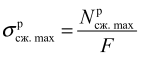

In [16]:
sigma_max = N_max * 1e+3 / F
print(sigma_max, "МПа")

138.60918538927783 МПа


### По формуле Эйлера находим sigma_kr
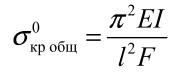

In [40]:
# В этом месте не сходится, так как ошибка в методичке
sigma_kr = np.pi ** 2 * E * I / l ** 2 / F
print(sigma_kr, 'МПа')

485.5610336440722 МПа


### Cигму со звездочкой примем равной 171.8 МПа, посчитаем s & sigma_kr_true
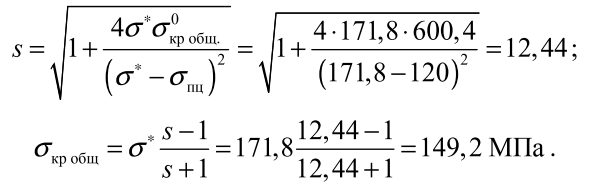

In [18]:
s = (1 + ((4 * sigma_star * sigma_kr) / ((sigma_star - sigma_pc) ** 2))) ** (1/2)
sigma_kr_true = sigma_star * (s - 1) / (s + 1)
s, sigma_kr_true

(11.196258507141785, 143.6274256159135)

### Запас по общей устойчивости
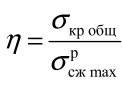

In [19]:
zapas_obsh = sigma_kr_true / sigma_max
zapas_obsh

1.0362042400908869

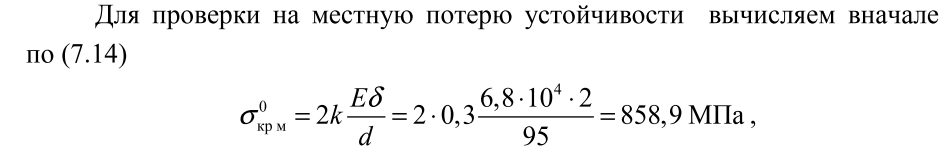

In [20]:
sigma_kr_mestn = 2 * k * E * delta_true / d;
sigma_kr_mestn

850.0

Это значение превышает сигма_пц. Критическое меридиональное напряжение цилиндрической оболочки за пределом пц определяется по формуле 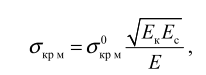
Ек и Ес - касательный и секущий модули материала.
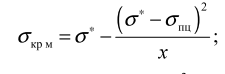
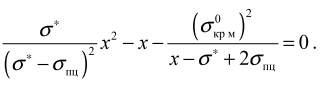

In [21]:
x, y = sympy.symbols('x y');
equation = x ** 2 * sigma_star / (sigma_star - sigma_pc) ** 2 - x - sigma_kr_mestn ** 2 / (x - 
    sigma_star + 2 * sigma_pc);
roots = sympy.solve(equation, x);
x = roots[0];
print(f'x = {x}');

sigma_kr_m_true = sigma_star - (sigma_star - sigma_pc) ** 2 / x
print(f'Критическое меридиональное напряжение цилиндрической оболочки за пределом пц\n\t\
{sigma_kr_m_true} МПа')


x = 209.530238229634
Критическое меридиональное напряжение цилиндрической оболочки за пределом пц
	158.994020191686 МПа


### Запас местной устойчивости
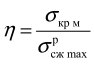

In [22]:
zapas_m = sigma_kr_m_true / sigma_max
zapas_m

1.14706698365738

# 7.4. Определение перемещений переходной фермы

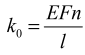

In [29]:
k_0 = E * F * n_nodes / l
print(f'k_0 = {k_0} Н/мм')

k_0 = 260040.71179222706 Н/мм


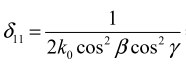

In [41]:
delta11 = 1 / 2 / k_0 / cos_betta ** 2 / np.cos(gamma) ** 2
delta11, 'mm/H'

(2.1260989648289843e-06, 'mm/H')

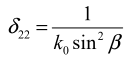

In [44]:
delta22 = 1 / k_0 / sin_betta ** 2
delta22, 'mm/H'

(4.1811586103039125e-05, 'mm/H')

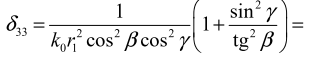

In [48]:
delta33 = 1 / k_0 / r1 ** 2 / cos_betta ** 2 / np.cos(gamma) ** 2 * (1 + np.sin(gamma) ** 2/tg_betta ** 2)
delta33, '1 / (H * mm)'

(4.421348457302096e-12, '1 / (H * mm)')

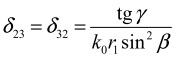

In [50]:
delta23 = delta32 = tg_gamma / k_0 / r1 / sin_betta ** 2
delta23, '1 / H'

(-2.6522645671732728e-09, '1 / H')

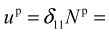

In [53]:
u = delta11 * N_p * 1e+3
print(f'Осевое перемещение = {u} [mm]')

Осевое перемещение = -1.7008791718631875 [mm]


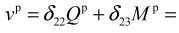

In [56]:
nu = delta22 * Q_p * 1e+3 + delta23 * M_p * 1e+6
print(f'Радиальное перемещение = {nu} [mm]')

Радиальное перемещение = -1.7848004965258282 [mm]


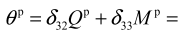

In [57]:
tetta_p = delta32 * Q_p * 1e+3 + delta33 * M_p * 1e+6
print(f'Угол поворота = {tetta_p} [рад]')

Угол поворота = 0.0009638376284756173 [рад]
